In [64]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [299]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

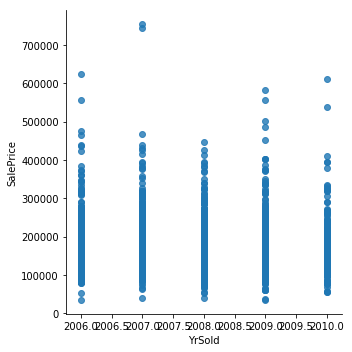

In [182]:
sns.lmplot("YrSold", "SalePrice", train, fit_reg=False)

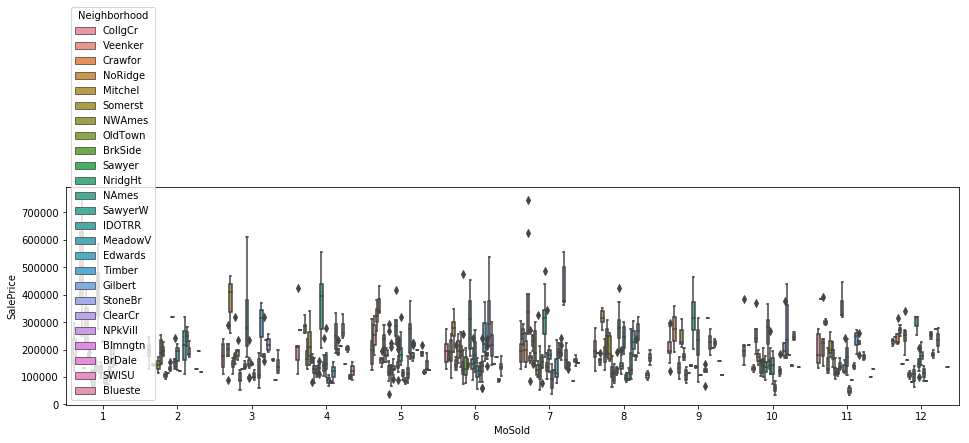

In [183]:
#sns.lmplot("MoSold", "SalePrice", train, fit_reg=False)
sns.boxplot(x="MoSold", y="SalePrice", hue="Neighborhood", data = train)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrMo
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2006-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2006-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2006-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2006-01


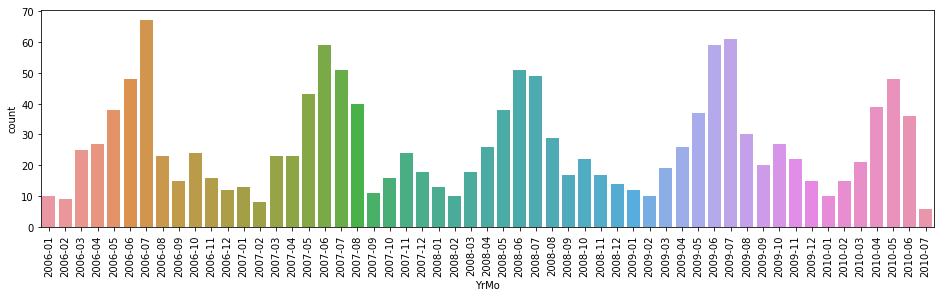

In [241]:
#train['YrMo'] = str(train.YrSold) + "-" + str(train.MoSold)
train['YrMo'] = train[['YrSold', 'MoSold']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
train['YrMo'] = sorted(pd.to_datetime(train.YrMo).dt.to_period('M'))

# number of house sold (time series)
sns.countplot(x="YrMo", data = train)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize']=16,4
train.head()


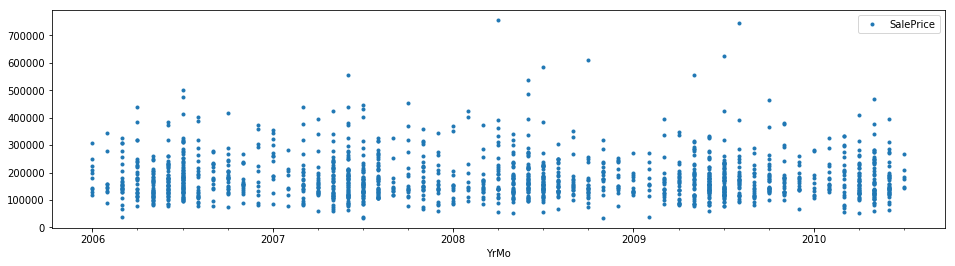

In [185]:
# price (time series)

train.plot("YrMo", "SalePrice", style=".")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

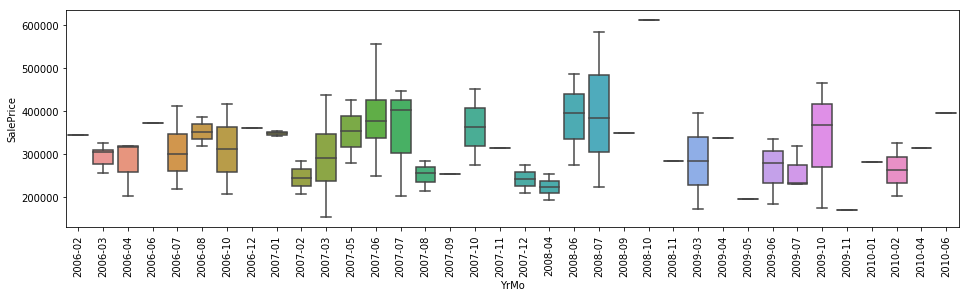

In [186]:
# best neighborhood time series
train_best = train.loc[train.Neighborhood == "NridgHt",] 
sns.boxplot("YrMo", "SalePrice", data = train_best)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

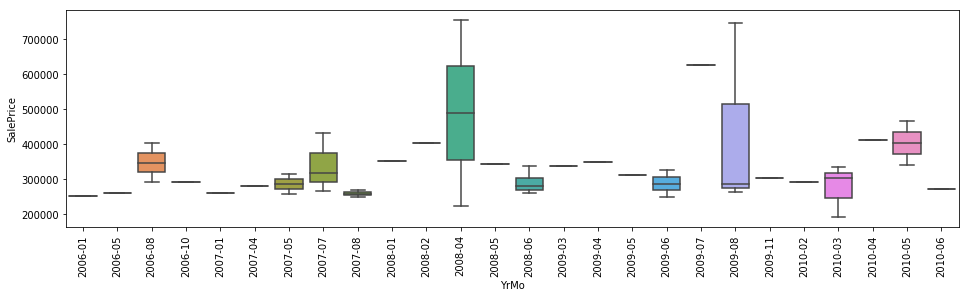

In [187]:
# 2nd best neighborhood time series
train_best2 = train.loc[train.Neighborhood == "NoRidge",] 
sns.boxplot("YrMo", "SalePrice", data = train_best2)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

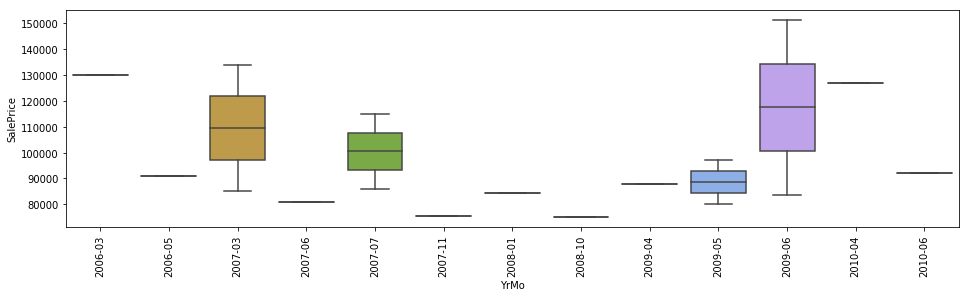

In [188]:
# worst neighborhood time series
train_worst = train.loc[train.Neighborhood == "MeadowV",]
sns.boxplot("YrMo", "SalePrice", data = train_worst)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

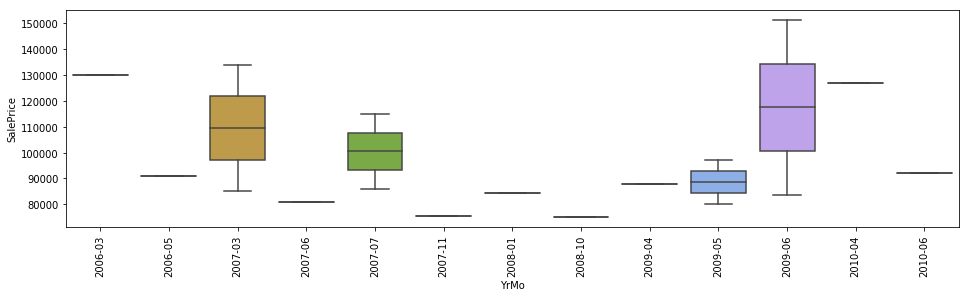

In [242]:
# 2nd worst neighborhood time series
train_worst2 = train.loc[train.Neighborhood == "MeadowV",]
sns.boxplot("YrMo", "SalePrice", data = train_worst2)
plt.xticks(rotation=90)

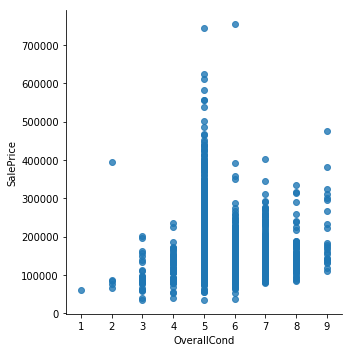

In [190]:
sns.lmplot("OverallCond", "SalePrice", train, fit_reg=False)

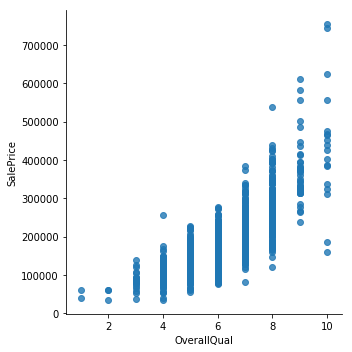

In [191]:
sns.lmplot("OverallQual", "SalePrice", train, fit_reg=False)

In [307]:
index_ = train.groupby(by='Neighborhood')['OverallQual'].median()
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, order=index_)
#plt.xticks(rotation=90)
index

TypeError: median() takes 1 positional argument but 3 were given

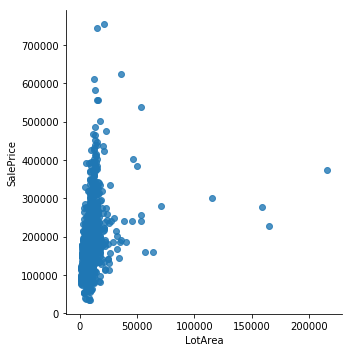

In [138]:
sns.lmplot("LotArea", "SalePrice", train, fit_reg=False)

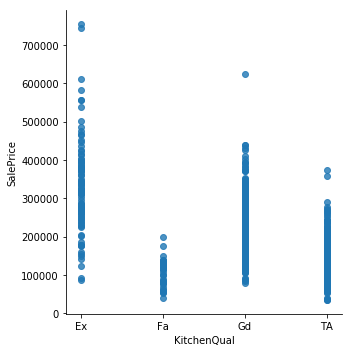

In [271]:
sns.lmplot("KitchenQual", "SalePrice", train, fit_reg=False)

       #Ex	Excellent
       #Gd	Good
       #TA	Typical/Average
       #Fa	Fair
       #Po	Poor

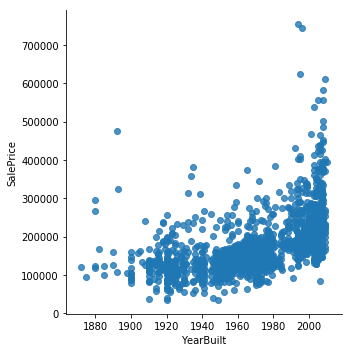

In [200]:
sns.lmplot("YearBuilt", "SalePrice", train, fit_reg=False)

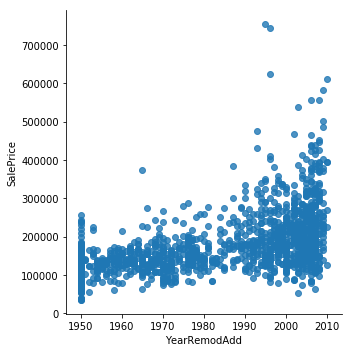

In [199]:
sns.lmplot("YearRemodAdd", "SalePrice", train, fit_reg=False)

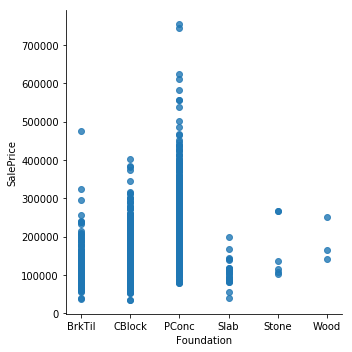

In [201]:
sns.lmplot("Foundation", "SalePrice", train, fit_reg=False) 

In [297]:
train_col = train.columns
[pd.factorize(train[x]) for x in train_col]

list(zip(train_col,[pd.factorize(train[x]) for x in train_col]))

[('Id',
  (array([   0,    1,    2, ..., 1457, 1458, 1459]),
   Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
               ...
               1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
              dtype='int64', length=1460))),
 ('MSSubClass',
  (array([0, 1, 0, ..., 2, 1, 1]),
   Int64Index([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40], dtype='int64'))),
 ('MSZoning',
  (array([0, 0, 0, ..., 0, 0, 0]),
   Index(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype='object'))),
 ('LotFrontage',
  (array([ 0,  1,  2, ..., 12,  2,  6]),
   Float64Index([ 65.0,  80.0,  68.0,  60.0,  84.0,  85.0,  75.0,  51.0,  50.0,
                  70.0,
                 ...
                 149.0, 313.0, 168.0, 182.0, 138.0, 160.0, 152.0, 124.0, 153.0,
                  46.0],
                dtype='float64', length=110))),
 ('LotArea',
  (array([   0,    1,    2, ...,  302, 1072,  553]),
   Int64Index([ 8450,  9600, 11250,  9550, 14260, 14115, 10

In [298]:
train.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF

In [300]:
test.isnull().sum(axis=0)

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond